In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
#convert csv to dataframe
df_final = pd.read_csv("std_env.csv")
df_final

,ownerNo,modelYear,price,Kms Driven,Mileage,Seats,Fuel type_Cng,Fuel type_Diesel,Fuel type_Electric,Fuel type_Lpg,...,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Bangalore,City_Chennai,City_Delhi,City_Jaipur,City_Kolkata,City_hyderabad
0,3,2015,4.00,120000,23.10,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,2018,8.11,32706,17.00,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,2018,5.85,11949,23.84,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,2014,4.62,17794,19.10,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,2015,7.90,60000,23.65,5,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,1,2022,5.10,10000,25.24,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7436,1,2014,1.80,120000,22.74,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7437,3,2011,5.50,50000,11.74,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7438,1,2012,1.40,40000,18.50,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
#statistical details of the data
df_final.describe()

,ownerNo,modelYear,price,Kms Driven,Mileage,Seats,Fuel type_Cng,Fuel type_Diesel,Fuel type_Electric,Fuel type_Lpg,...,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Bangalore,City_Chennai,City_Delhi,City_Jaipur,City_Kolkata,City_hyderabad
count,7440.000000,7440.000000,7440.000000,7.440000e+03,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,...,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000,7440.000000
mean,1.366532,2016.401478,6.431452,5.968454e+04,19.635031,5.175672,0.012903,0.282124,0.002823,0.001882,...,0.000134,0.000134,0.000134,0.000134,0.177151,0.167876,0.163172,0.137903,0.169892,0.184005
std,0.642772,3.737448,3.667781,4.418047e+04,3.712095,0.620633,0.112865,0.450063,0.053056,0.043341,...,0.011593,0.011593,0.011593,0.011593,0.381822,0.373782,0.369547,0.344822,0.375564,0.387515
min,0.000000,1985.000000,1.000000,1.010000e+02,7.080000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2014.000000,3.800000,3.219150e+04,17.400000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2017.000000,5.650000,5.556450e+04,19.245568,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2019.000000,8.100000,8.000000e+04,21.700000,5.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2023.000000,18.250000,2.000022e+06,140.000000,10.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#create x and y data
x=df_final.drop(columns=["price"], axis=1) #feature data input for model training
y=df_final["price"]                        #target variable output to be predicted

In [5]:
#scaling the data with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [6]:
import pickle
with open ('standard.pkl','wb') as f:
    pickle.dump(scaler,f)

In [7]:
#function to choose the best algorithms
def best_ML_algorithm(x,y,algorithms):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=42)
    results=[]
    for algorithm in algorithms:
        model=algorithm().fit(x_train,y_train)   #Train the model using the training data
        y_pred=model.predict(x_test)    #Use the trained model to predict on the test set
        MSE_1=mean_squared_error(y_test,y_pred)
        MAE_1=mean_absolute_error(y_test,y_pred)
        RMSE_1=np.sqrt(mean_squared_error(y_test,y_pred))
        r_squr_1=r2_score(y_test, y_pred)
        results.append({"model": type(model).__name__,
                                   "MAE": MAE_1,
                                   "MSE": MSE_1,
                                   "RMSE": RMSE_1,
                                   "R2": r_squr_1})
        print(f"Trainscore: {model.score(x_train, y_train)}")
        print(f"Testscore: {model.score(x_test, y_test)}")
        #plot Actual vs Predicted prices
        plt.figure(figsize=(10,6))
        sns.scatterplot(x=y_test, y=y_pred)
        plt.xlabel('Actual Prices')
        plt.ylabel('Predicted prices')
        plt.title(f'{type(model).__name__}: Actual vs Predicted Prices')
        plt.plot([y.min(), y.max()], [y.min(), y.max()], color= "red",linestyle="--")
        plt.show()
    results_df = pd.DataFrame(results)
    return results_df

Trainscore: 0.8932994230669031
Testscore: -3.046291211163869e+27


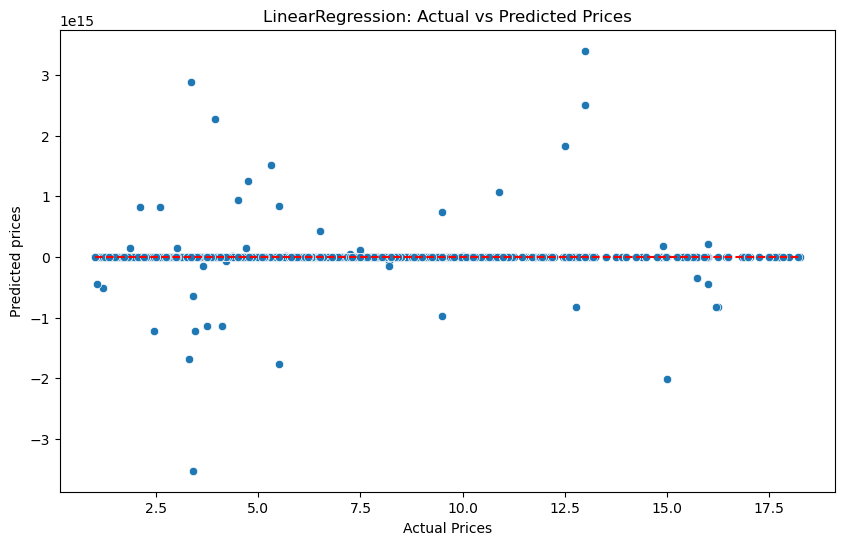

Trainscore: 0.9997161936718325
Testscore: 0.7758546279922257


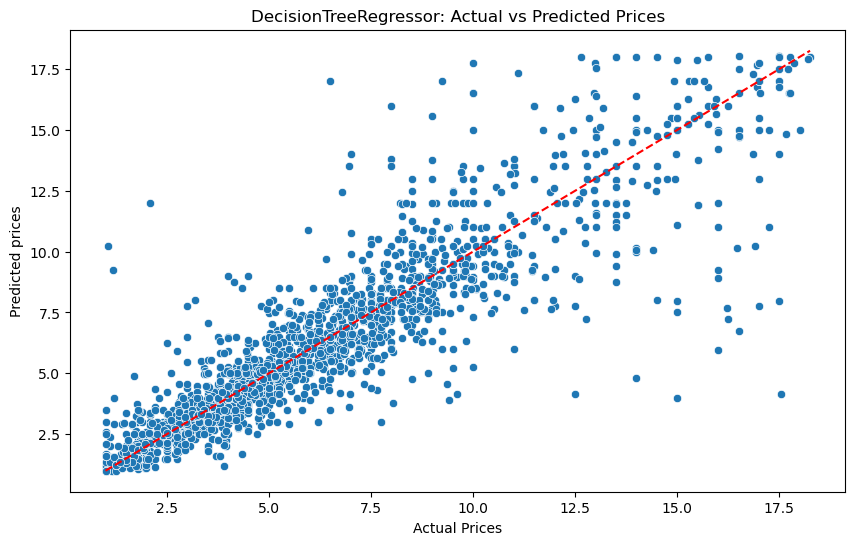

Trainscore: 0.9819751612919452
Testscore: 0.8797735187400022


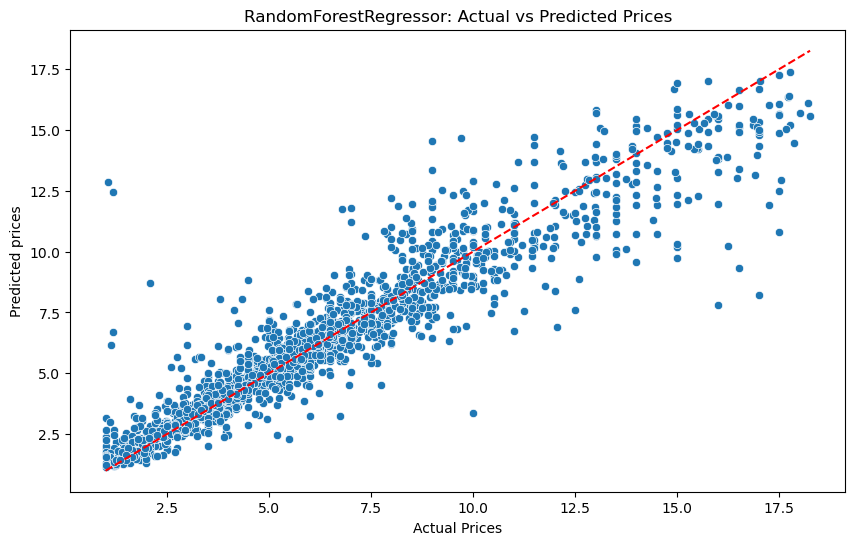

Trainscore: 0.8344679337923944
Testscore: 0.8025631656956045


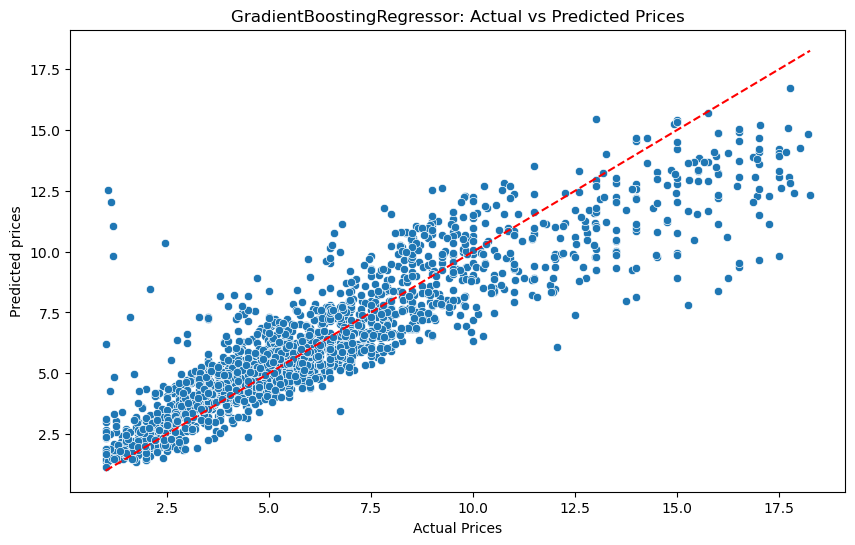

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#using above function try to identify the best algorithm

algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor]
results_df = best_ML_algorithm(x_scaled,y, algorithms)


In [9]:
results_df

,model,MAE,MSE,RMSE,R2
0,LinearRegression,2.275750e+13,4.070422e+28,2.017529e+14,-3.046291e+27
1,DecisionTreeRegressor,1.052965e+00,2.995007e+00,1.730609e+00,7.758546e-01
2,RandomForestRegressor,7.868154e-01,1.606453e+00,1.267459e+00,8.797735e-01
3,GradientBoostingRegressor,1.133997e+00,2.638130e+00,1.624232e+00,8.025632e-01


## L1 and L2 regularization

In [10]:
# using ridge to fit and evalutes the model
from sklearn.linear_model import Ridge
X_train,X_test,Y_train,Y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
values=[]
for i in alpha_values:
    ridgeModel = Ridge(alpha = i)
    ridgeModel.fit(X_train, Y_train)
    y_pred=ridgeModel.predict(X_test)
    r_squr = r2_score(Y_test, y_pred)
    values.append(r_squr)

In [11]:
#best alpha values for prediction
best_alpha_ridge = alpha_values[np.argmax(values)]
ridgeModel_1 = Ridge(alpha=best_alpha_ridge)
ridgeModel_1.fit(X_train,Y_train)
y_pred_ridge = ridgeModel_1.predict(X_test)

In [12]:
#model evaluation
MSE_ridge = mean_squared_error(Y_test, y_pred_ridge)
MAE_ridge = mean_absolute_error(Y_test, y_pred_ridge)
RMSE_ridge = np.sqrt(mean_squared_error(Y_test, y_pred_ridge))
r_squr_ridge = r2_score(Y_test, y_pred_ridge)

In [13]:
#create dataframe to view above evaluation metrics
ridge = pd.DataFrame({"model":"RidgeRegressor","MAE":[MAE_ridge], "MSE":[MSE_ridge], "RMSE":[RMSE_ridge], "R2":[r_squr_ridge]})
ridge

,model,MAE,MSE,RMSE,R2
0,RidgeRegressor,0.919191,2.124322,1.457505,0.841016


In [14]:
# using lasso to fit and evaluate the model
from sklearn.linear_model import Lasso
alpha_Values_L = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
Values_L=[]
for i in alpha_Values_L:
    LassoModel = Lasso(alpha=i)
    LassoModel.fit(X_train, Y_train)
    y_pred = LassoModel.predict(X_test)
    r_squr = r2_score(Y_test, y_pred)
    Values_L.append(r_squr)
print(Values_L)

C:\Users\jagadesh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.589e+02, tolerance: 7.522e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\jagadesh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.811e+00, tolerance: 7.522e+00
  model = cd_fast.enet_coordinate_descent(


[0.8350583254668769, 0.8360973616800805, 0.8386934109885797, 0.7757778248790241, 0.3998728578326727, -5.300535646401983e-06, -5.300535646401983e-06]


In [15]:
#best alpha values for prediction
best_alpha_lasso = alpha_Values_L[np.argmax(Values_L)]
LassoModel_1 = Lasso(alpha= best_alpha_lasso)
LassoModel_1.fit(X_train, Y_train)
y_pred_lasso = LassoModel_1.predict(X_test)

In [16]:
#model evaluation
MSE_lasso = mean_squared_error(Y_test, y_pred_lasso)
MAE_lasso = mean_absolute_error(Y_test, y_pred_lasso)
RMSE_lasso = np.sqrt(mean_squared_error(Y_test, y_pred_lasso))
r_squr_lasso = r2_score(Y_test, y_pred_lasso)


In [17]:
#create a dataframe to view the above avaluation metrics
lasso = pd.DataFrame({"model":"LassoRegressor","MAE":[MAE_lasso], "MSE":[MSE_lasso], "RMSE":[RMSE_lasso], "R2":[r_squr_lasso]})
lasso

,model,MAE,MSE,RMSE,R2
0,LassoRegressor,0.922046,2.155362,1.468115,0.838693


In [18]:
#find the model with the highest R2 score
best_model_df = pd.concat([results_df, ridge, lasso], ignore_index=True)
best_model_df

,model,MAE,MSE,RMSE,R2
0,LinearRegression,2.275750e+13,4.070422e+28,2.017529e+14,-3.046291e+27
1,DecisionTreeRegressor,1.052965e+00,2.995007e+00,1.730609e+00,7.758546e-01
2,RandomForestRegressor,7.868154e-01,1.606453e+00,1.267459e+00,8.797735e-01
3,GradientBoostingRegressor,1.133997e+00,2.638130e+00,1.624232e+00,8.025632e-01
4,RidgeRegressor,9.191905e-01,2.124322e+00,1.457505e+00,8.410164e-01
5,LassoRegressor,9.220458e-01,2.155362e+00,1.468115e+00,8.386934e-01


In [19]:
#convert the dataframe to csv 
best_model_df.to_csv("ref.csv",index=False)

In [20]:
best_model = best_model_df.loc[best_model_df['R2'].idxmax()]
print("Best model with high R2 score")
best_model

Best model with high R2 score


model    RandomForestRegressor
MAE                   0.786815
MSE                   1.606453
RMSE                  1.267459
R2                    0.879774
Name: 2, dtype: object

## hyperparameter tuning for the best model-random forest

In [21]:
#parameters for model
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators' : [100,150,200,300],
    'max_depth' : [10,20,30,None],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'max_features' : ['sqrt','log2', None],
    'bootstrap' : [True,False]
}

In [22]:
#tuning the model using grid search cv
grid_tuning = RandomizedSearchCV(estimator=RandomForestRegressor(),
                                param_distributions=param_grid, cv=5, n_jobs=-1)
grid_tuning.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 150, 200, 300]})

In [23]:
grid_tuning.best_params_,grid_tuning.best_score_

({'n_estimators': 150,
  'min_samples_split': 10,
  'min_samples_leaf': 1,
  'max_features': None,
  'max_depth': 10,
  'bootstrap': True},
 0.825077258761838)

In [24]:
#final model fit and prediction
final_model = RandomForestRegressor(n_estimators=200, max_features=None, max_depth=20, min_samples_leaf=4,
                                   min_samples_split=5,random_state=42)
final_model.fit(X_train,Y_train)

#model evaluation
y_pred_fm=final_model.predict(X_test)
MSE_fm=mean_squared_error(Y_test,y_pred_fm)
MAE_fm=mean_absolute_error(Y_test,y_pred_fm)
RMSE_fm=np.sqrt(mean_squared_error(Y_test,y_pred_fm))
r_squr_fm=r2_score(Y_test,y_pred_fm)

print(f"Trainscore: {final_model.score(X_train, Y_train)}")
print(f"Trainscore: {final_model.score(X_test, Y_test)}")

Trainscore: 0.9279915627896193
Trainscore: 0.8523835105249457


In [25]:
#create dataframe to view above evaluation metrics
rf_1 = pd.DataFrame({"model":"RandomForestRegressor","MAE":[MAE_fm],"MSE":[MSE_fm],"RMSE":[RMSE_fm],"R2":[r_squr_fm]})
rf_1

,model,MAE,MSE,RMSE,R2
0,RandomForestRegressor,0.874738,1.972436,1.404434,0.852384


## store the model using pickle

In [26]:
import pickle
with open ('RandomForest_regression.pkl','wb') as files:
    pickle.dump(final_model,files)

In [27]:
#load the model,scaler, and encoder
with open('RandomForest_regression.pkl','rb') as files:
    final_model=pickle.load(files)

with open('standard.pkl','rb') as f:
    scaler=pickle.load(f)

with open('encoder.pkl','rb') as file:
    encoder=pickle.load(file)

## model system building-pipeline

In [28]:
#read final csv file
df_1=pd.read_csv(r"C:/Users/jagadesh/Documents/Python Scripts/car dekho - used car prediction/filtered_data")
df_1

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5,Others,Kolkata
8355,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5,Others,Kolkata
8356,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5,Others,Kolkata
8357,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5,Others,Kolkata


In [29]:
# x and y data splitting
x_df= df_1.drop(columns=['price'],axis=1)
y_df= df_1['price']

In [30]:
x_df_train,x_df_test,y_df_train,y_df_test= train_test_split(x_df,y_df, random_state=42)

In [34]:
#building pipeline for categorical and numerical data
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num=x_df.select_dtypes(include=['int','float']).columns.to_list()
cat=x_df.select_dtypes(include=['object']).columns.to_list()

catg_preprocessor=Pipeline(steps=[("categorical",encoder)])
num_preprocessor=Pipeline(steps=[("numerical",scaler)])

preprocessor=ColumnTransformer([("numerical", num_preprocessor, num),
                               ("categorical",catg_preprocessor, cat)])
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('numerical',
                                                  StandardScaler())]),
                                 ['ownerNo', 'modelYear', 'Kms Driven',
                                  'Mileage', 'Seats']),
                                ('categorical',
                                 Pipeline(steps=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Fuel type', 'body type', 'transmission',
                                  'Brand', 'model', 'Insurance Validity',
                                  'Color', 'City'])])

In [36]:
#combine pipeline to combine preprocessor and model
pipeline=Pipeline([("preprocessing",preprocessor),
                  ("model",final_model)])
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('numerical',
                                                                   StandardScaler())]),
                                                  ['ownerNo', 'modelYear',
                                                   'Kms Driven', 'Mileage',
                                                   'Seats']),
                                                 ('categorical',
                                                  Pipeline(steps=[('categorical',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Fuel type', 'body type',
                                                   'transmission', 'Brand',
                                                   'model',
                                                   'Insurance Validity',
                                                   'Color', 'City'])])),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features=None,
                                       min_samples_leaf=4, min_samples_split=5,
                                       n_estimators=200, random_state=42))])

In [37]:
#fit with dataframe
pipeline.fit(x_df_train,y_df_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('numerical',
                                                                   StandardScaler())]),
                                                  ['ownerNo', 'modelYear',
                                                   'Kms Driven', 'Mileage',
                                                   'Seats']),
                                                 ('categorical',
                                                  Pipeline(steps=[('categorical',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Fuel type', 'body type',
                                                   'transmission', 'Brand',
                                                   'model',
                                                   'Insurance Validity',
                                                   'Color', 'City'])])),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features=None,
                                       min_samples_leaf=4, min_samples_split=5,
                                       n_estimators=200, random_state=42))])

In [38]:
#evaluate the pipeline
y_prediction=pipeline.predict(x_df_test)
MSE_pipe=mean_squared_error(y_df_test, y_prediction)
MAE_pipe=mean_absolute_error(y_df_test, y_prediction)
RMSE_pipe=np.sqrt(mean_squared_error(y_df_test, y_prediction))
r_squr_pipe=r2_score(y_df_test, y_prediction)

In [39]:
#create dataframe to view above evaluation metrics
RF_Pipe=pd.DataFrame({"model":"RandomForestRegressor", "MAE":[MAE_pipe], "MSE":[MSE_pipe], "RMSE":[RMSE_pipe], "R2":[r_squr_pipe]})
RF_Pipe

,model,MAE,MSE,RMSE,R2
0,RandomForestRegressor,2.540851,51.895825,7.203876,0.641419


In [40]:
x_df.columns

Index(['Fuel type', 'body type', 'transmission', 'ownerNo', 'Brand', 'model',
       'modelYear', 'Insurance Validity', 'Kms Driven', 'Mileage', 'Seats',
       'Color', 'City'],
      dtype='object')

In [41]:
df_1[df_1["price"]>45]

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
16,Diesel,SUV,Automatic,1,Mercedes-Benz,Mercedes-Benz GLA,2022,55.95,Comprehensive,16000,19.245568,5,Blue,Bangalore
24,Petrol,Sedan,Automatic,2,Mercedes-Benz,Mercedes-Benz S-Class,2016,49.00,Third Party insurance,50000,7.810000,5,Others,Bangalore
38,Petrol,Sedan,Automatic,1,BMW,BMW 5 Series,2020,49.65,Zero Dep,18157,15.560000,5,Blue,Bangalore
52,Diesel,Sedan,Automatic,1,Mercedes-Benz,Mercedes-Benz E-Class,2022,79.90,Third Party,400,19.245568,5,White,Bangalore
93,Diesel,Sedan,Automatic,2,Mercedes-Benz,Mercedes-Benz E-Class,2018,59.90,Comprehensive,24000,17.000000,5,White,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8086,Lpg,Hatchback,Manual,2,Maruti,Maruti Wagon R,2009,65.00,Third Party insurance,120000,17.300000,5,Silver,Kolkata
8106,Petrol,Convertibles,Automatic,3,Jaguar,Jaguar F-TYPE,2014,64.00,Comprehensive,31828,15.150000,2,Orange,Kolkata
8232,Diesel,Sedan,Automatic,1,Mercedes-Benz,Mercedes-Benz E-Class,2020,55.41,Comprehensive,20000,16.100000,5,Grey,Kolkata
8300,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2009,75.00,Third Party insurance,50000,21.100000,5,Others,Kolkata


In [42]:
df_1.loc[24]

Fuel type                            Petrol
body type                             Sedan
transmission                      Automatic
ownerNo                                   2
Brand                         Mercedes-Benz
model                 Mercedes-Benz S-Class
modelYear                              2016
price                                  49.0
Insurance Validity    Third Party insurance
Kms Driven                            50000
Mileage                                7.81
Seats                                     5
Color                                Others
City                              Bangalore
Name: 24, dtype: object

In [43]:
x_df[x_df["Brand"]=="BMW"]

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
20,Diesel,Sedan,Automatic,3,BMW,BMW 5 Series,2011,Third Party insurance,100000,18.48,5,White,Bangalore
38,Petrol,Sedan,Automatic,1,BMW,BMW 5 Series,2020,Zero Dep,18157,15.56,5,Blue,Bangalore
72,Diesel,Sedan,Automatic,1,BMW,BMW 3 Series GT,2016,Comprehensive,40525,21.76,5,White,Bangalore
88,Diesel,SUV,Automatic,2,BMW,BMW X3,2016,Comprehensive,92000,16.55,5,White,Bangalore
116,Diesel,Sedan,Automatic,2,BMW,BMW 3 Series,2008,Third Party insurance,80000,13.20,5,Others,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7930,Diesel,Sedan,Automatic,3,BMW,BMW 6 Series,2018,Comprehensive,44226,17.09,4,White,Kolkata
8133,Diesel,Sedan,Automatic,2,BMW,BMW 3 Series,2015,Third Party insurance,70000,18.88,5,Blue,Kolkata
8140,Petrol,Sedan,Automatic,3,BMW,BMW 3 Series,2010,Third Party insurance,20000,12.05,5,Others,Kolkata
8271,Diesel,Sedan,Automatic,1,BMW,BMW 3 Series,2018,Comprehensive,23000,22.69,5,Blue,Kolkata


In [44]:
df_1.iloc[20]

Fuel type                            Diesel
body type                             Sedan
transmission                      Automatic
ownerNo                                   3
Brand                                   BMW
model                          BMW 5 Series
modelYear                              2011
price                                  22.0
Insurance Validity    Third Party insurance
Kms Driven                           100000
Mileage                               18.48
Seats                                     5
Color                                 White
City                              Bangalore
Name: 20, dtype: object

## Model prediction

In [45]:
#New data to predict car price
new_df=pd.DataFrame({
    'Fuel type':'Diesel',
    'body type':'Sedan',
    'transmission':'Automatic',
    'ownerNo':3,
    'Brand':'BMW',
    'model':'BMW 5 Series',
    'modelYear':2011,
    'Insurance Validity':'Third Party insurance',
    'Kms Driven':100000.0,
    'Mileage':18,
    'Seats':5,
    'Color':'White',
    'City':'Bangalore'
},index=[0])
new_df

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Diesel,Sedan,Automatic,3,BMW,BMW 5 Series,2011,Third Party insurance,100000.0,18,5,White,Bangalore


In [48]:
#Final model prediction
prediction=pipeline.predict(new_df)
print(f"The price of the {new_df['Brand'].iloc[0]} car is: {round(prediction[0],2)} lakhs")

The price of the BMW car is: 14.88 lakhs


In [49]:
#save the pipeline in pickle
with open ('pipeline.pkl','wb') as files:
    pickle.dump(pipeline,files)

In [1]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)


Scikit-learn version: 1.2.2


In [2]:
import numpy
print("numpy version:", numpy.__version__)

numpy version: 1.26.4
